In [1]:
import math
import numpy as np
import scipy as sp
from scipy.linalg import eigh, eig
from numpy import sin, cos, abs, exp, sqrt, arccos, pi
from scipy.sparse import csc_matrix

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
U = 0.0 # Kerr non-linearity
gamma = 5e-2 # Loss rate
J = 1.0 # Tunneling
Nx = 100 # Number of cavities in the vertical direction
Ny = 100 # Number of cavities in the horizontal direction
N = Nx*Ny # Total number of lattice sites
F = 1.0 # Pump

# Momenta
kx_list = np.arange(-pi, pi + 2*pi/Nx, 2*pi/Nx)
ky_list = np.arange(-pi, pi + 2*pi/Ny, 2*pi/Ny)

# Detuning
Delta_list_ldos = np.linspace(-4, 4, 25)

# Distance
d = 1

In [3]:
# Self energy
S_list = []
for Delta in Delta_list_ldos:
    #print('===> Delta = {:}'.format(Delta))
    S = 0
    for kx in kx_list:
        for ky in ky_list:
            S += abs(cos(kx*d) + cos(ky*d))**2 / (Delta + 2*J*(cos(kx)+cos(ky)) + 1j*gamma)
            #S += 1 / (Delta + 2*J*(cos(kx)+cos(ky)) + 1j*gamma) # 1 laser
    S *= 4*abs(F)**2 / (Nx*Ny)
    S_list.append(S)

ldos = -2*np.imag(S_list)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29320\3818590018.py:8: RuntimeWarning: invalid value encountered in arccos
  k_0 = arccos(-Delta_list_ldos_1d/(2*J))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29320\3818590018.py:9: RuntimeWarning: invalid value encountered in sqrt
  D = 1/sqrt(4*J**2 - Delta_list_ldos_1d**2)


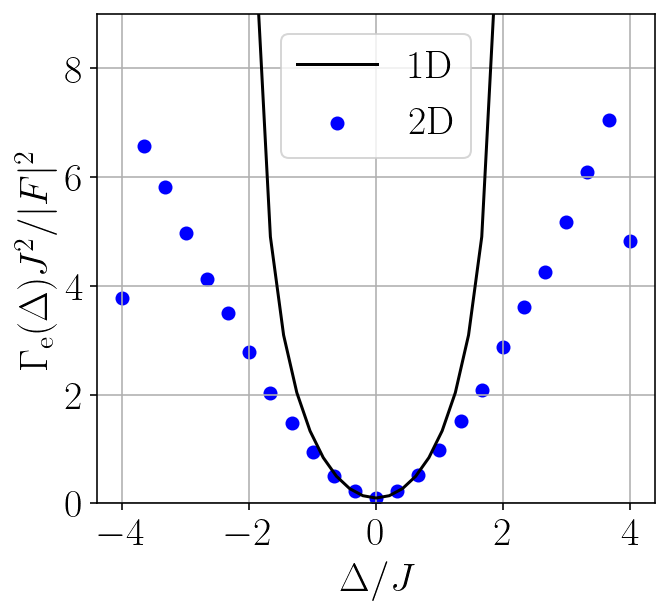

In [4]:
plt.rcParams["figure.figsize"] = [5, 4.5]
fig, ax = plt.subplots(1, 1)
fs = 20
ax.grid()

d=2
Delta_list_ldos_1d = np.linspace(-2.5, 2.5, 25)
k_0 = arccos(-Delta_list_ldos_1d/(2*J))
D = 1/sqrt(4*J**2 - Delta_list_ldos_1d**2)
ldos_1d = 4*abs(F)**2*D*(1 + cos(k_0*d)*exp(-gamma*D*d) )
ax.plot(Delta_list_ldos_1d, ldos_1d, '-k', label='1D')

ax.scatter(Delta_list_ldos, ldos, color='b', label='2D')
#ax.plot(Delta_list_ldos, ldos, '--b')

ax.set_ylim(0, 9)
ax.set_xticks(np.arange(-4, 5, 2))
ax.set_xlabel(r'$\Delta/J$',fontsize=fs)
ax.set_ylabel(r'$\Gamma_{\rm e}(\Delta)J^2/|F|^2$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

ax.legend(loc='best', fontsize=fs)